# Setup

In [ ]:
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 89.8 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Dataset

## Dataset initial

In [ ]:
# Constants defined
START = '2015-01-01'
END = '2025-05-02'

In [ ]:
# Function defined
def load_data (name, start, end):
  data = yf.download(name, start, end)
  data.reset_index(inplace=True)
  return data

In [ ]:
data = load_data('NVDA', START, END)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
0,2015-01-02,0.483099,0.486699,0.475419,0.483099,113680000
1,2015-01-05,0.474939,0.484539,0.472780,0.483099,197952000
2,2015-01-06,0.460540,0.476139,0.460060,0.475659,197764000
3,2015-01-07,0.459340,0.467980,0.457900,0.463900,321808000
4,2015-01-08,0.476619,0.479499,0.464380,0.464620,283780000
...,...,...,...,...,...,...
2593,2025-04-25,111.010002,111.919998,105.730003,106.849998,251064700
2594,2025-04-28,108.730003,110.370003,106.019997,109.690002,207708500
2595,2025-04-29,109.019997,110.199997,107.440002,107.669998,170444300


In [ ]:
data.columns = [col[0] for col in data.columns]

In [ ]:
data

,Date,Close,High,Low,Open,Volume
0,2015-01-02,0.483099,0.486699,0.475419,0.483099,113680000
1,2015-01-05,0.474939,0.484539,0.472780,0.483099,197952000
2,2015-01-06,0.460540,0.476139,0.460060,0.475659,197764000
3,2015-01-07,0.459340,0.467980,0.457900,0.463900,321808000
4,2015-01-08,0.476619,0.479499,0.464380,0.464620,283780000
...,...,...,...,...,...,...
2593,2025-04-25,111.010002,111.919998,105.730003,106.849998,251064700
2594,2025-04-28,108.730003,110.370003,106.019997,109.690002,207708500
2595,2025-04-29,109.019997,110.199997,107.440002,107.669998,170444300
2596,2025-04-30,108.919998,108.919998,104.080002,104.470001,235044600


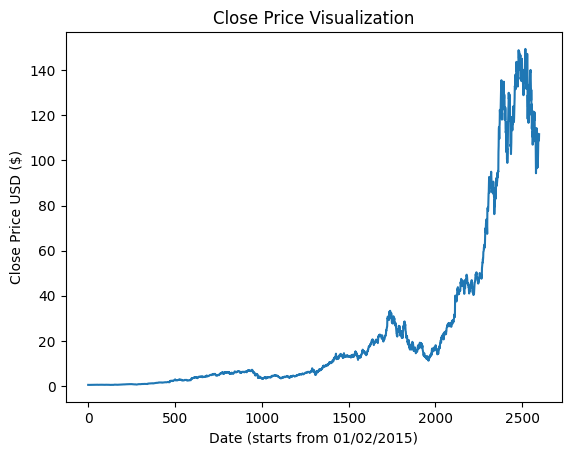

In [ ]:
plt.title("Close Price Visualization")
plt.plot(data.Close)
plt.xlabel('Date (starts from 01/02/2015)')
plt.ylabel('Close Price USD ($)')
plt.show()

## Dataset split

In [ ]:
# 90:10
train = pd.DataFrame(data[0:int(len(data)*0.90)])
test = pd.DataFrame(data[int(len(data)*0.90): int(len(data))])

print(train.shape)
print(test.shape)

(2338, 6)
(260, 6)


In [ ]:
train.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,0.483099,0.486699,0.475419,0.483099,113680000
1,2015-01-05,0.474939,0.484539,0.472780,0.483099,197952000
2,2015-01-06,0.460540,0.476139,0.460060,0.475659,197764000
3,2015-01-07,0.459340,0.467980,0.457900,0.463900,321808000
4,2015-01-08,0.476619,0.479499,0.464380,0.464620,283780000


In [ ]:
test.head()

,Date,Close,High,Low,Open,Volume
2338,2024-04-18,84.643188,86.161694,82.374937,84.942094,447260000
2339,2024-04-19,76.174973,84.296305,75.581173,83.122695,875198000
2340,2024-04-22,79.491882,80.046700,76.374910,78.078345,596341000
2341,2024-04-23,82.395927,82.741814,80.237640,80.742471,438559000
2342,2024-04-24,79.650833,84.054385,79.156992,83.922425,512208000


## Dataset normalization

GitHub: https://github.com/034adarsh/Stock-Price-Prediction-Using-LSTM

In [ ]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 1:2].values
test_close = test.iloc[:, 1:2].values

In [ ]:
train_close

array([[ 0.4830991 ],
       [ 0.47493941],
       [ 0.46054012],
       ...,
       [85.9727478 ],
       [87.38628387],
       [84.00739288]])

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[2.51389194e-04],
       [1.65053651e-04],
       [1.26986663e-05],
       ...,
       [9.04794186e-01],
       [9.19750428e-01],
       [8.83999298e-01]])

In [ ]:
data_testing_array = scaler.fit_transform(test_close)
data_testing_array

array([[0.11562082],
       [0.        ],
       [0.04528744],
       [0.08493783],
       [0.04745768],
       [0.08779058],
       [0.15744134],
       [0.15774166],
       [0.13924726],
       [0.09337283],
       [0.13126258],
       [0.17182746],
       [0.21756522],
       [0.19591787],
       [0.19397982],
       [0.17125422],
       [0.18669129],
       [0.19380242],
       [0.20686456],
       [0.25155127],
       [0.24785247],
       [0.22219226],
       [0.25359869],
       [0.26187004],
       [0.25591914],
       [0.37669929],
       [0.41314214],
       [0.51458164],
       [0.52719326],
       [0.46816127],
       [0.45632768],
       [0.52958193],
       [0.54919561],
       [0.6311306 ],
       [0.61144879],
       [0.60994742],
       [0.62225872],
       [0.61038315],
       [0.66894211],
       [0.72913932],
       [0.76012533],
       [0.74784018],
       [0.81063076],
       [0.74511015],
       [0.68764287],
       [0.57216278],
       [0.6810907 ],
       [0.685

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
data_training_array[1,0]

np.float64(0.0001650536510451068)

In [ ]:
x_test = []
y_test = []
for i in range(100, data_testing_array.shape[0]):
   x_test.append(data_testing_array[i-100: i])
   y_test.append(data_testing_array[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

# LSTM

GitHub: https://github.com/034adarsh/Stock-Price-Prediction-Using-LSTM

## Model

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5,
                                                  restore_best_weights=True,
                                                  verbose=1)

In [ ]:
model_1 = Sequential()
model_1.add(LSTM(50, activation = 'tanh', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model_1.add(Dropout(0.2))


model_1.add(LSTM(units = 60, activation = 'tanh', return_sequences=True))
model_1.add(Dropout(0.3))


model_1.add(LSTM(units = 80, activation = 'tanh', return_sequences=True))
model_1.add(Dropout(0.4))


model_1.add(LSTM(units = 100, activation = 'tanh'))
model_1.add(Dropout(0.5))

model_1.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        72,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,661 (604.14 KB)

 Trainable params: 154,661 (604.14 KB)

 Non-trainable params: 0 (0.00 B)

## Start

In [ ]:
model_1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model_1.fit(x_train, y_train, callbacks = [early_stopping], validation_data = (x_test, y_test) ,epochs = 50, verbose=2)

Epoch 1/50
62/62 - 24s - 388ms/step - MAE: 0.0682 - loss: 0.0130 - val_MAE: 0.0678 - val_loss: 0.0069
Epoch 2/50
62/62 - 14s - 232ms/step - MAE: 0.0403 - loss: 0.0045 - val_MAE: 0.1069 - val_loss: 0.0194
Epoch 3/50
62/62 - 15s - 236ms/step - MAE: 0.0370 - loss: 0.0038 - val_MAE: 0.0733 - val_loss: 0.0093
Epoch 4/50
62/62 - 21s - 341ms/step - MAE: 0.0377 - loss: 0.0038 - val_MAE: 0.0585 - val_loss: 0.0052
Epoch 5/50
62/62 - 20s - 319ms/step - MAE: 0.0346 - loss: 0.0034 - val_MAE: 0.0585 - val_loss: 0.0053
Epoch 6/50
62/62 - 15s - 235ms/step - MAE: 0.0350 - loss: 0.0032 - val_MAE: 0.0598 - val_loss: 0.0057
Epoch 7/50
62/62 - 20s - 325ms/step - MAE: 0.0377 - loss: 0.0035 - val_MAE: 0.0974 - val_loss: 0.0151
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


## Accuracy

In [ ]:
scaler.scale_

array([0.00962183])

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.08621713e-02],
       [2.18218485e-02],
       [2.63035621e-02],
       [2.22546297e-02],
       [2.53226378e-02],
       [1.21467971e-02],
       [1.20987143e-02],
       [2.88496341e-05],
       [1.02241855e-02],
       [0.00000000e+00],
       [1.05128287e-02],
       [1.92653525e-02],
       [1.08109416e-02],
       [2.07177077e-02],
       [2.48632092e-02],
       [2.73830743e-02],
       [3.25769260e-02],
       [4.39938200e-02],
       [3.94443502e-02],
       [2.50843531e-02],
       [3.35388007e-02],
       [3.19998966e-02],
       [3.63184226e-02],
       [3.76457627e-02],
       [3.86556834e-02],
       [3.86556834e-02],
       [2.56326062e-02],
       [1.98713049e-02],
       [2.39975367e-02],
       [3.45678811e-02],
       [6.49229816e-02],
       [7.34543983e-02],
       [8.50924728e-02],
       [8.96322160e-02],
       [8.85549795e-02],
       [1.04636668e-01],
       [1.01472311e-01],
       [1.11609838e-01],
       [1.34539681e-01],
       [1.36107472e-01],


In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(260, 100, 1)
(260,)


### Other experimented models

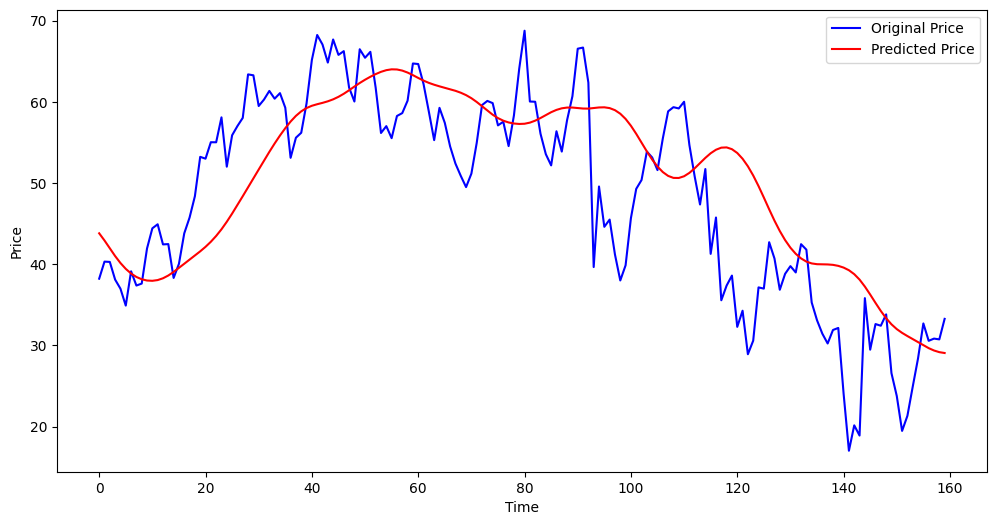

In [ ]:
# Model 1
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred_1, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Final model

In [ ]:
y_pred = model_1.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step


In [ ]:
scale_factor = 1/0.00962183
y_test = y_test * scale_factor
y_pred = y_pred * scale_factor

In [ ]:
y_test

array([ 39.15727424,  30.68905789,  34.00596784,  36.91001308,
        34.16491102,  37.11895169,  42.2202703 ,  42.24225059,
        40.88770493,  37.52780334,  40.30289655,  43.27392025,
        46.62381971,  45.0383399 ,  44.89637974,  43.23193569,
        44.36255861,  44.88340214,  45.84008249,  49.11299372,
        48.84208917,  46.96270217,  49.26295711,  49.86875395,
        49.43289425,  58.27899453,  60.94810782,  68.37766598,
        69.30136445,  64.97778636,  64.11107947,  69.47630648,
        70.91283761,  76.91386024,  75.47234711,  75.36237701,
        76.26407994,  75.39430603,  79.68323141,  84.09216717,
        86.36159172,  85.46182666,  90.06068858,  85.26186022,
        81.05289853,  72.59498186,  80.57301722,  80.88294613,
        78.47353744,  78.02364728,  78.78346635,  77.15385812,
        82.76248571,  80.31308374,  82.68248388,  85.86172903,
        89.39085823,  81.88269441,  83.72224833,  82.9224436 ,
        80.84295284,  72.47500962,  75.57425294,  72.41

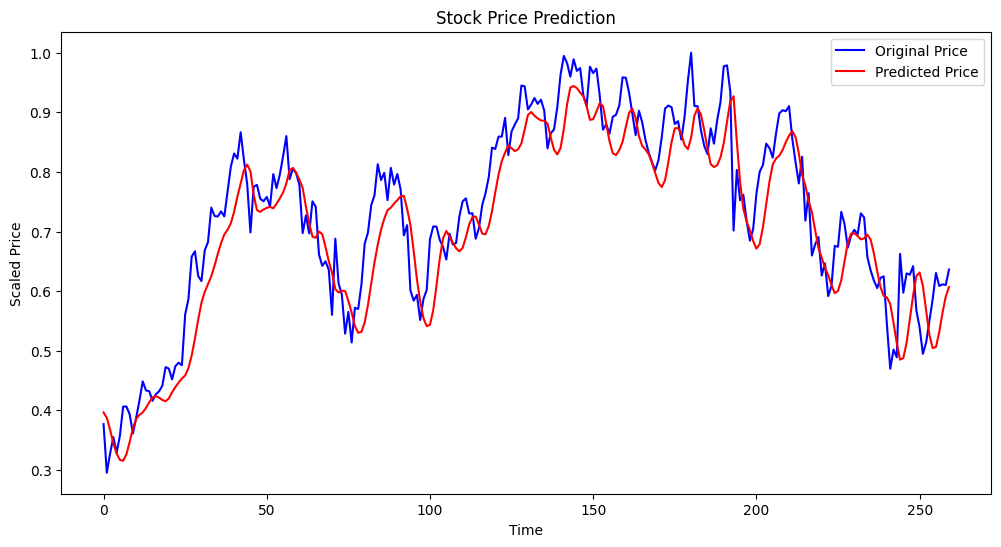

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Scaled Price')
plt.title("Stock Price Prediction")
plt.legend()
plt.show()

In [ ]:
rss = np.sum((y_test - y_pred) ** 2)
print("Residual Sum of Squares (RSS):", rss)

Residual Sum of Squares (RSS): 17854400.354331326


In [ ]:
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 264.1183484368539


In [ ]:
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 16.251718322591426


# State-space representation

The MambaStock model leverages the Mamba framework to
`predict future stock price movement` rates based on historical
market data: https://arxiv.org/pdf/2402.18959  

GitHub: https://github.com/zshicode/MambaStock


In [ ]:
!git clone https://github.com/zshicode/MambaStock.git
%cd MambaStock

Cloning into 'MambaStock'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 33 (delta 6), reused 5 (delta 5), pack-reused 22 (from 1)
Receiving objects: 100% (33/33), 625.99 KiB | 7.63 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/MambaStock/MambaStock


In [ ]:
!pip install numpy pandas matplotlib scikit-learn torch

In [ ]:
# format columns of datafram to:
# trade_date, open, high, low, close, pre_close, change, pct_chg, vol
MambaStock_data = data.copy()
MambaStock_data.rename(columns={'Date': 'trade_date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'vol'}, inplace=True)

MambaStock_data['pre_close'] = MambaStock_data['close'].shift(1)
MambaStock_data.dropna(inplace=True) # Drop the row if it now has NaN in pre_close

MambaStock_data['change'] = MambaStock_data['close'] - MambaStock_data['pre_close']
MambaStock_data['pct_chg'] = MambaStock_data['change'] / MambaStock_data['pre_close']

MambaStock_data['trade_date'] = MambaStock_data['trade_date'].astype(str)
MambaStock_data['trade_date'] = MambaStock_data['trade_date'].str.replace('-', '')

MambaStock_data.to_csv('NVDA.SH.csv', index=False)

MambaStock_data

,trade_date,close,high,low,open,vol,pre_close,change,pct_chg
1,20150105,0.474939,0.484539,0.472780,0.483099,197952000,0.483099,-0.008160,-0.016890
2,20150106,0.460540,0.476139,0.460060,0.475659,197764000,0.474939,-0.014399,-0.030318
3,20150107,0.459340,0.467980,0.457900,0.463900,321808000,0.460540,-0.001200,-0.002606
4,20150108,0.476619,0.479499,0.464380,0.464620,283780000,0.459340,0.017279,0.037618
5,20150109,0.478539,0.482139,0.471820,0.478299,209540000,0.476619,0.001920,0.004028
...,...,...,...,...,...,...,...,...,...
2593,20250425,111.010002,111.919998,105.730003,106.849998,251064700,106.430000,4.580002,0.043033
2594,20250428,108.730003,110.370003,106.019997,109.690002,207708500,111.010002,-2.279999,-0.020539
2595,20250429,109.019997,110.199997,107.440002,107.669998,170444300,108.730003,0.289993,0.002667
2596,20250430,108.919998,108.919998,104.080002,104.470001,235044600,109.019997,-0.099998,-0.000917


In [ ]:
!python main.py --ts-code NVDA

# to save figure:
# go to file -> MambaStock -> MambaStock -> main.py
# replace last line "plt.show()" in main.py to "plt.savefig('nvda_prediction_plot.png')"
from google.colab import files
files.download('nvda_prediction_plot.png')

Epoch 10 | Lossp: 0.0037
Epoch 20 | Lossp: 0.0103
Epoch 30 | Lossp: 0.0057
Epoch 40 | Lossp: 0.0010
Epoch 50 | Lossp: 0.0000
Epoch 60 | Lossp: 0.0003
Epoch 70 | Lossp: 0.0000
Epoch 80 | Lossp: 0.0000
Epoch 90 | Lossp: 0.0000
Training start 2015-01-05 00:00:00
Training end 2024-02-20 00:00:00
Testing start 2024-02-21 00:00:00
Testing end 2025-05-01 00:00:00
MSE RMSE MAE R2
18.4310 4.2931 3.1990 0.9514


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python main2025.py --ts-code NVDA

### To save figure ###
# 1. create a new python script named "main2025.py" inside MambaStock folder
# 2. copy code from main.py to main2025.py
# 3. change line 119, 120, and 121:
#     - line 119 -> plt.plot(time.tail(82), data1[-82:], label='Stock Price')
#     - line 120 -> plt.plot(time.tail(82), finalpredicted_stock_price[-82:], label='Predicted Stock Price')
#     - line 121 -> plt.title('Stock Price Prediction for 2025')
#     - add new line before plotting -> plt.xticks(rotation=35, fontsize=8)
# 4. modify last line to "plt.savefig('nvda_prediction_plot_2025.png')"

from google.colab import files
files.download('nvda_prediction_plot_2025.png')

Epoch 10 | Lossp: 0.0037
Epoch 20 | Lossp: 0.0103
Epoch 30 | Lossp: 0.0057
Epoch 40 | Lossp: 0.0010
Epoch 50 | Lossp: 0.0000
Epoch 60 | Lossp: 0.0003
Epoch 70 | Lossp: 0.0000
Epoch 80 | Lossp: 0.0000
Epoch 90 | Lossp: 0.0000
Training start 2015-01-05 00:00:00
Training end 2024-02-20 00:00:00
Testing start 2024-02-21 00:00:00
Testing end 2025-05-01 00:00:00
MSE RMSE MAE R2
18.4310 4.2931 3.1990 0.9514


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Smoothing

In [ ]:
win_5 = data.Close.rolling(5).mean()
win_10 = data.Close.rolling(10).mean()
win_20 = data.Close.rolling(20).mean()
win_50 = data.Close.rolling(50).mean()
win_100 = data.Close.rolling(100).mean()
win_200 = data.Close.rolling(200).mean()

Text(0.5, 1.0, 'Graph Of Moving Averages Of 50, 100 Days')

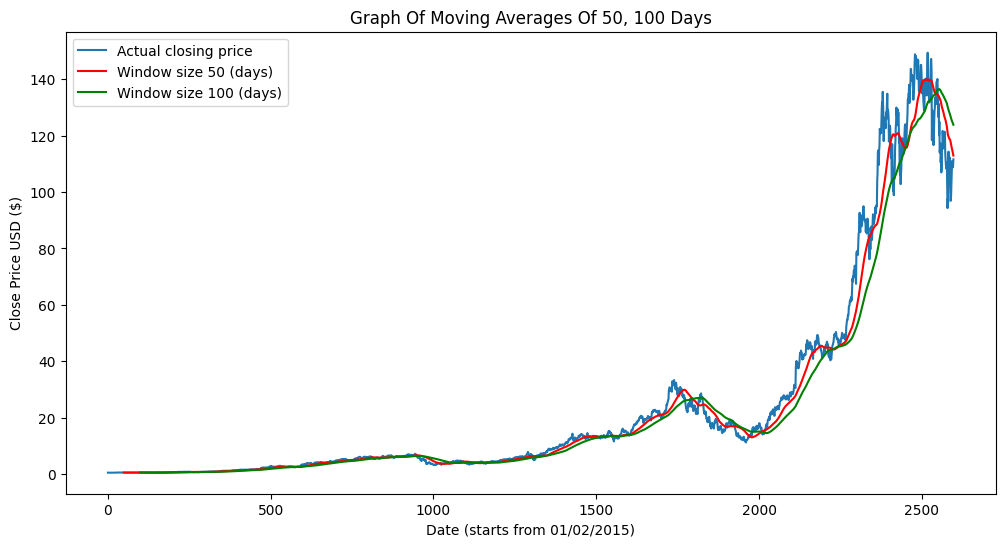

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(win_50, 'r')
plt.plot(win_100, 'g')
# plt.plot(win_200, 'r')

plt.legend(['Actual closing price', 'Window size 50 (days)', 'Window size 100 (days)'])
plt.xlabel('Date (starts from 01/02/2015)')
plt.ylabel('Close Price USD ($)')
plt.title('Graph Of Moving Averages Of 50, 100 Days')

In [ ]:
tail_5 = win_5.tail(260)

In [ ]:
tail_10 = win_10.tail(260)

In [ ]:
tail_20 = win_20.tail(260)

In [ ]:
tail_50 = win_50.tail(260)

In [ ]:
tail_100 = win_100.tail(260)

In [ ]:
data_tail = data.Close.tail(260)

Text(0.5, 1.0, 'Graph Of Moving Averages Of 5, 10 Days')

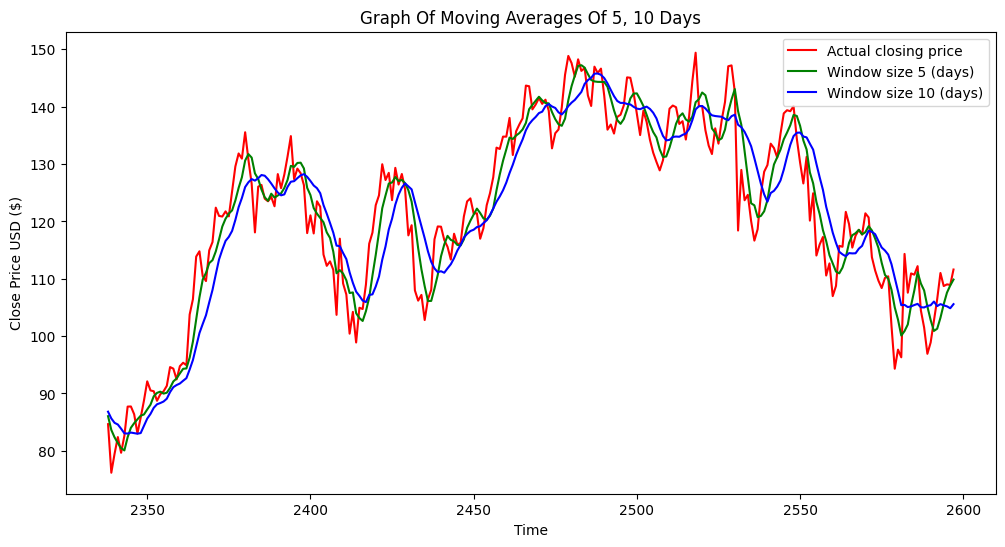

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(data_tail, 'r')
plt.plot(tail_5, 'g')
plt.plot(tail_10, 'b')

plt.legend(['Actual closing price', 'Window size 5 (days)', 'Window size 10 (days)'])
plt.xlabel('Time')
plt.ylabel('Close Price USD ($)')
plt.title('Graph Of Moving Averages Of 5, 10 Days')

In [ ]:
rss = np.sum((data_tail - tail_10) ** 2)
print("Residual Sum of Squares (RSS):", rss)

rss = np.sum((data_tail - tail_5) ** 2)
print("Residual Sum of Squares (RSS):", rss)

Residual Sum of Squares (RSS): 11693.882029033652
Residual Sum of Squares (RSS): 5633.615329621591


In [ ]:
mse = np.mean((data_tail - tail_5) ** 2)
print("Mean Squared Error (MSE):", mse)

mse = np.mean((data_tail - tail_10) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 21.667751267775348
Mean Squared Error (MSE): 44.97646934243712


In [ ]:
rmse = np.sqrt(np.mean((data_tail - tail_5) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

rmse = np.sqrt(np.mean((data_tail - tail_10) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4.654863184646285
Root Mean Squared Error (RMSE): 6.706449831500801
